# Линейная алгебра. Лабораторная работа 1, осень 2017

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [3]:
Z = np.zeros((3, 4))
print(Z)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [4]:
D = np.diag([1, 2, 3, 4, 5])
print(D)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [5]:
tr = np.trace(D)
print(tr)

15


In [6]:
InvD = sla.inv(D)
print(InvD)

[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [7]:
X = np.random.rand(4, 5)
print(X)

[[ 0.91474186  0.82602731  0.04168666  0.12150719  0.10706256]
 [ 0.73186352  0.12817575  0.18943789  0.52639667  0.52291241]
 [ 0.15474485  0.87188874  0.18104503  0.64211241  0.33866486]
 [ 0.12433083  0.77789705  0.74616896  0.69700147  0.08910618]]


In [8]:
det = sla.det(X[np.ix_([1, 2], [0, 1])])
print(det)

0.6182690243894274


In [9]:
Mult = np.dot(X, X.T)
print(Mult)

[[ 1.54703795  0.90318522  0.98358227  0.88163073]
 [ 0.90318522  1.1384708   0.77440179  0.7455474 ]
 [ 0.98358227  0.77440179  1.34391549  1.31029984]
 [ 0.88163073  0.7455474   1.31029984  1.67110104]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Основной враг питониста - это циклы, которые в Питоне выполняются очень медленно. Библиотечные функции обычно пишутся на более эффективных языках, таких как C++ или Fortran, и обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [13]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    Y = X.copy()
    rows = Y.shape[0]
    cols = Y.shape[1]
    det = 1
    st = 0
    if (rows != cols):
        raise ValueError
    for i in range(rows):
        if Y[i][i] == 0:
            for l in range(i, rows):
                if Y[l][i] != 0:
                    t = Y[i].copy()
                    Y[i] = Y[l].copy()
                    Y[l] = t
                    det *= -1
        #print(Y)
        #print("f")
        #print(det)
        for j in range(i, rows):
            if j == i:
                p = Y[j][i]
                if p != 0:
                    det *= p;
                    for k in range(i, cols):
                        #print(Y[j][k], j, k)
                        Y[j][k] = float(Y[j][k]) / float(p)
                        #print(Y[j][k], j, k)
                        
            else:
                p = Y[j][i]
                if p != 0:
                    for k in range(st, cols):
                        Y[j][k] = Y[j][k] - Y[i][k] * p
        #print(Y)
        #print("s")
    return det

Простая проверка:

In [14]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [95]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

14.5 µs ± 349 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
521 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
107 µs ± 2.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
446 ms ± 7.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.7 ms ± 794 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


/Users/arinaruck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars


8min 59s ± 21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


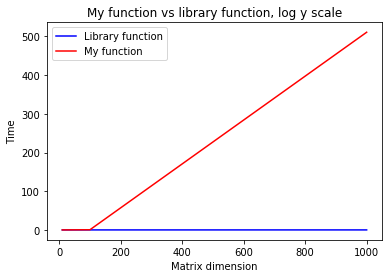

In [16]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

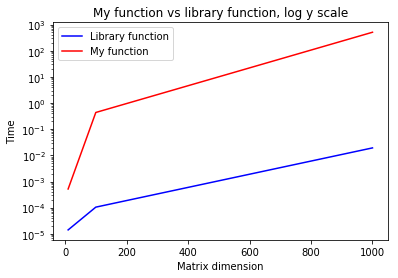

In [17]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [18]:
A = np.array([[1,0], [10**20,1]])
B = np.array([[10**(-20),1], [0,1 - 10**20]])
AF = np.array([[1.,0.], [10.**20,1.]])
BF = np.array([[10.**(-20),1.], [0.,1. - 10.**20]])
M = np.dot(A, B) 
print(M)
MF = np.dot(AF, BF)
print(MF)


[[1e-20 1]
 [1.0 1]]
[[  1.00000000e-20   1.00000000e+00]
 [  1.00000000e+00   0.00000000e+00]]


И какой из них правильный?

---
Первый (смотрим на значение MF[2][2] = $10^{20}$ + 1 - $10^{20}$)

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [19]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    
    for i in range (dim):
        for j in range (dim):
            if j == 0  or i == 0:
                P[i][j] = 1
            else:
                P[i][j] = P[i-1][j] + P[i][j-1]        
    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
1
Заметим, что каждый элемент матрицы Паскаля P[i][j] = P[i-1][j] + P[i][j-1] (кроме первого ряда и столбца, которые равны 1)
Тогда, если мы будем вычитать из последнего столбца предпоследний мы из матрицы размера n $\times$ n получим матрицу вида P[0][0] = 0, дальше все элементы певой строки нулевые, а матрица размера (n-1) $\times$ (n-1) со второй строки до последней и со второго столбца до последнего, является также матрицей Паскаля (но меньшего размера), разложив матрицу P по первой строке, получим det(P) = 1 $\cdot$ det(P[2:][2:])
То есть определитель матрицы Паскаля размера n $\times$ n  равен определителю матрицы Паскаля (n-1) $\times$ (n-1), продолжая так, поймем что определители матриц Паскаля любого размера равны, а значит они равны определителю матрицы Паскаля 1 $\times$ 1, то есть равны 1

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [20]:
X = sla.pascal(30)
print(sla.det(X))

1.0299188904699096e+48


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` нужно умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами; вместо этого постарайтесь свести всё к библиотечным функциям. Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [78]:
def prod_and_sq_sum(A) :
    d = A.diagonal()
    p = d.prod()
    d = d * d
    return p, d.sum()

In [82]:
X_c = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
n = 1
for i in range(3):
    for j in range(3):
        X_c[i][j] = np.random.randint(1, 10)
        n += 1
print(X_c)
print(prod_and_sq_sum(X_c))
print()
Y_c = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
n = 1
for i in range(4):
    for j in range(4):
        Y_c[i][j] = np.random.randint(1, 10)
        n += 1
print(Y_c)  
print(prod_and_sq_sum(Y_c))

[[6 4 9]
 [8 1 2]
 [8 1 2]]
(12, 41)

[[3 8 6 6]
 [7 9 2 5]
 [1 9 7 7]
 [1 4 4 8]]
(1512, 203)


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_m$ и $b_1,\ldots,b_m$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [104]:
def f(A, B, k) :
    m = A.shape[0]
    n = A.shape[1]
    k = min(k, m)
    T = B[:, : k]
    N = A[:, : k]
    Res = np.dot(T.T, N)
    return np.trace(Res)
        

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две матрицы `A` и `B` и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [90]:
def get_diag(A, B) :
    out = np.multiply(A, B.T)
    res = out.sum(axis=1)
    return res

In [92]:
X_c = np.array([[0, 0], [0, 0], [0, 0]])
n = 1
for i in range(3):
    for j in range(2):
        X_c[i][j] = np.random.randint(1, 10)
        n += 1
print(X_c)
print()
Y_c = np.array([[0, 0, 0], [0, 0, 0]])
n = 1
for i in range(2):
    for j in range(3):
        Y_c[i][j] = np.random.randint(1, 10)
        n += 1
print(Y_c)        
print(get_diag(X_c, Y_c))        

[[5 9]
 [4 5]
 [2 8]]

[[6 9 9]
 [3 8 2]]
[57 76 34]


## Бонус. Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены степени 3 (члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

19.6 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
78 µs ± 6.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
60.6 µs ± 7.66 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
151 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
138 µs ± 17.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
375 µs ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
417 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.18 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.39 ms ± 405 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.87 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.9 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.4 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


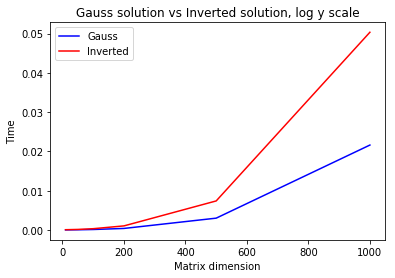

In [107]:
m = 10
gauss_times = []
inverted_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, m)
    res_gauss = %timeit -o np.linalg.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inverted = %timeit -o (sla.inv(A)).dot(B)
    inverted_times.append(res_inverted.best)    

plt.plot(dimensions, gauss_times, color='blue', label='Gauss')
plt.plot(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

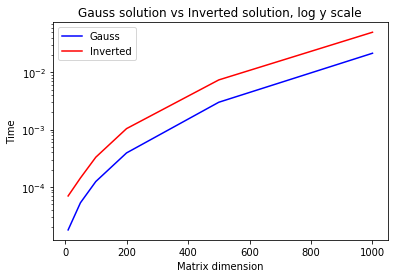

In [108]:
plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

При фиксированном m, для обратной матрицы мы каждый раз считаем $n^2$ алгебраических дополнений каждое из котторых может находится (например) методом Гаусса (или похожим по количеству операций методом), то есть вместо того чтобы привести матрицу размера $n \times n$ к улучшенному ступенчатому виду методом Гаусса мы работаем с $n^2$ матрицами меньшего размера $(n-1) \times (n-1)$, на каждом цикле количество операций для вычисления через обратную матрицу больше, чем для метода Гаусса

155 µs ± 29.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
461 µs ± 91.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
270 µs ± 60 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
764 µs ± 289 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
999 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
785 µs ± 96.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.72 ms ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.24 ms ± 67.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.18 ms ± 897 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.45 ms ± 507 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.94 ms ± 823 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.85 ms ± 448 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.7 ms ± 883 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.92 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

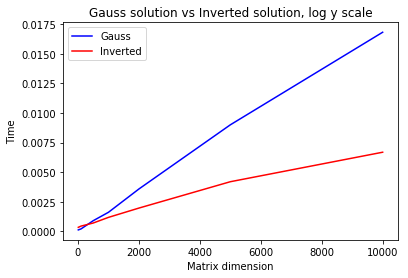

In [111]:
n = 100
gauss_times = []
inverted_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
for dim in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, dim)
    res_gauss = %timeit -o np.linalg.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inverted = %timeit -o (sla.inv(A)).dot(B)
    inverted_times.append(res_inverted.best)    

plt.plot(dimensions, gauss_times, color='blue', label='Gauss')
plt.plot(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

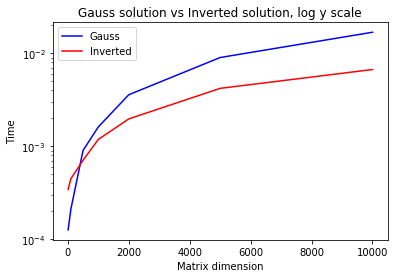

In [113]:
plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss')
plt.semilogy(dimensions, inverted_times, color='red', label='Inverted')
plt.title('Gauss solution vs Inverted solution, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

При фиксированном n = 100, быстрее искать обратную матрицу, так как эта операция выполняется за O(1) (примерно), так как время ее выполнения не зависит от размера задачи (от m), от m зависит только время умножения матриц, а время приведения к улучшенному ступенчатому виду зависит от m.
То есть в этом случае метод Гаусса работает быстрее только при m < 5*n (примерно, судя по графику)